In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Load your data into a DataFrame
df = pd.read_excel("/content/drive/MyDrive/Hackathon/merged_data__latest.xlsx")  # Replace "your_data.csv" with your file path

# Convert the DateTime column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract year, month, day, and hour into separate columns
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour

new_column_order = ['DateTime', 'Year', 'Month', 'Day', 'Hour','Pressure | (atm)','Wind speed | (m/s)','Air temperature | (°C)','Power generated by system | (MW)']  # Define the new column order
df = df[new_column_order]  # Rearrange the columns

# Save the modified DataFrame back to the file
df.to_csv("modified_data.csv", index=False)  # Replace "modified_data.csv" with your desired file path

In [5]:
df

,DateTime,Year,Month,Day,Hour,Pressure | (atm),Wind speed | (m/s),Air temperature | (°C),Power generated by system | (MW)
0,2019-01-01 01:00:00.000,2019,1,1,1,0.979103,9.014,10.926,33.6881
1,2019-01-01 02:00:00.000,2019,1,1,2,0.979566,9.428,9.919,37.2619
2,2019-01-01 03:00:00.005,2019,1,1,3,0.979937,8.700,8.567,30.5029
3,2019-01-01 04:00:00.010,2019,1,1,4,0.980053,8.481,7.877,28.4192
4,2019-01-01 05:00:00.015,2019,1,1,5,0.979867,8.383,7.259,27.3703
...,...,...,...,...,...,...,...,...,...
43818,2023-12-31 19:00:00.000,2023,12,31,19,0.985015,8.703,11.713,30.4221
43819,2023-12-31 20:00:00.000,2023,12,31,20,0.985244,8.854,12.115,32.0366
43820,2023-12-31 21:00:00.000,2023,12,31,21,0.985639,9.333,11.856,36.3990
43821,2023-12-31 22:00:00.000,2023,12,31,22,0.986212,9.457,10.761,37.7404


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Read data from file
data_file = "/content/drive/MyDrive/Hackathon/merged_data__latest.xlsx"  # Replace with the actual file path
df = pd.read_excel(data_file)

In [7]:
# Preprocessing
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%YYYY-%mm-%dd %HH:%MM:%SS')
df.set_index('DateTime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Function to create input and output sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 3  # You can adjust this as needed

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
model.fit(X, y, epochs=20, batch_size=1)


Epoch 1/20
43820/43820 [==============================] - 139s 3ms/step - loss: 0.0139
Epoch 2/20
43820/43820 [==============================] - 133s 3ms/step - loss: 0.0113
Epoch 3/20
43820/43820 [==============================] - 133s 3ms/step - loss: 0.0110
Epoch 4/20
43820/43820 [==============================] - 134s 3ms/step - loss: 0.0108
Epoch 5/20
43820/43820 [==============================] - 131s 3ms/step - loss: 0.0107
Epoch 6/20
43820/43820 [==============================] - 128s 3ms/step - loss: 0.0106
Epoch 7/20
43820/43820 [==============================] - 129s 3ms/step - loss: 0.0106
Epoch 8/20
43820/43820 [==============================] - 130s 3ms/step - loss: 0.0105
Epoch 9/20
43820/43820 [==============================] - 133s 3ms/step - loss: 0.0104
Epoch 10/20
43820/43820 [==============================] - 131s 3ms/step - loss: 0.0104
Epoch 11/20
43820/43820 [==============================] - 133s 3ms/step - loss: 0.0104
Epoch 12/20
43820/43820 [================

In [10]:
# Load the validation dataset
validation_data_file = "/content/drive/MyDrive/Hackathon/wind_power_gen_3months_validation_data.xlsx"  # Update this path
df_validation = pd.read_excel(validation_data_file)

# Assuming the validation dataset has a 'DateTime' column like the training dataset
df_validation['DateTime'] = pd.to_datetime(df_validation['DateTime'], format='%Y-%m-%d %H:%M:%S')  # Adjust format as needed
df_validation.set_index('DateTime', inplace=True)

# Normalize the validation data using the same scaler as the training data
scaled_validation_data = scaler.transform(df_validation)  # Use the same scaler object

# Create sequences from the validation data
X_val, y_val = create_sequences(scaled_validation_data, sequence_length)  # Use the same sequence_length as before


In [11]:
# Predict using the model on the validation dataset
predicted_validation_output = model.predict(X_val)

69/69 [==============================] - 0s 2ms/step


In [14]:
predicted_validation_output

array([[0.89754486],
       [0.8529357 ],
       [0.93151414],
       ...,
       [0.20465991],
       [0.2792626 ],
       [0.2662304 ]], dtype=float32)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_val, predicted_validation_output)
mae = mean_absolute_error(y_val, predicted_validation_output)

print(f"MSE on Validation Set: {mse}")
print(f"MAE on Validation Set: {mae}")


MSE on Validation Set: 0.011877561150181478
MAE on Validation Set: 0.0724441207829554


Root Mean Square Error (RMSE): 0.29105746848897385


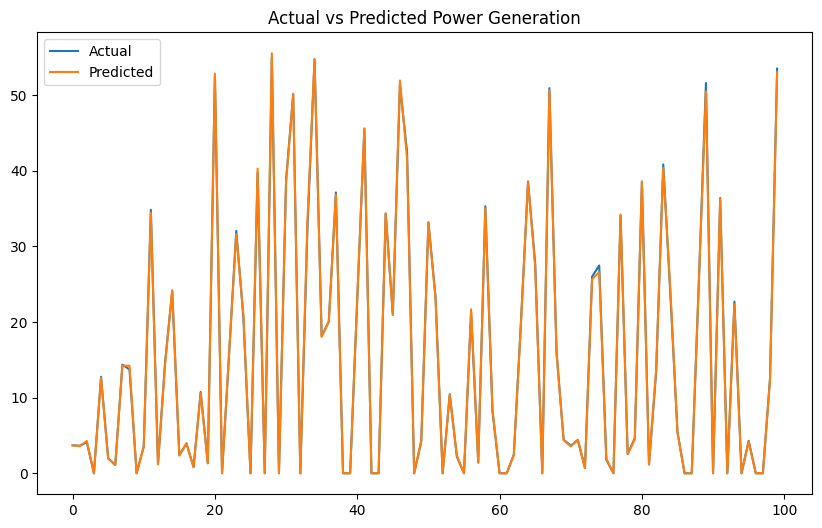

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/drive/MyDrive/Hackathon/merged_data__latest.xlsx'  # Update this to the path of your dataset
df = pd.read_excel(file_path)

# Convert DateTime column to datetime type and extract useful features
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

# Selecting features and target for the model
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute','Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']]  # Features
y = df['Power generated by system | (MW)']  # Target variable

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Square Error (RMSE): {rmse}')

# Plotting the first few actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(predictions[:100], label='Predicted')
plt.title('Actual vs Predicted Power Generation')
plt.legend()
plt.show()


Root Mean Square Error (RMSE): 5.695638528830947


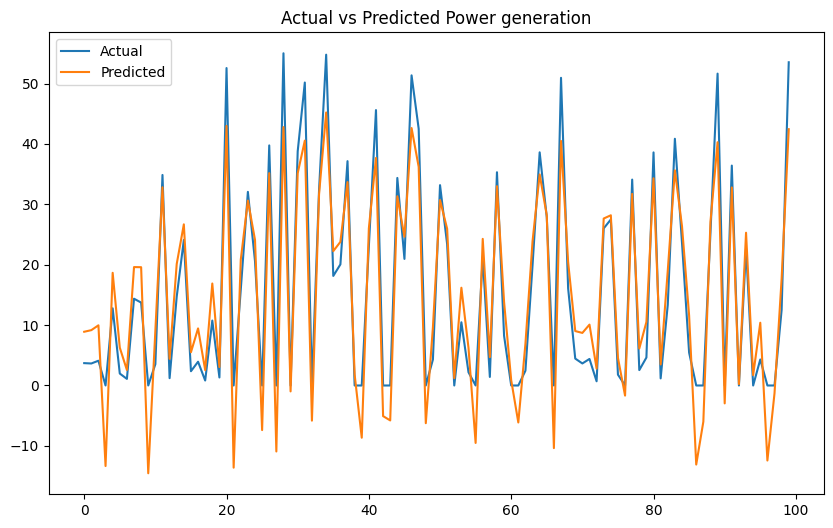

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/drive/MyDrive/Hackathon/merged_data__latest.xlsx'  # Update this to the path of your dataset
df = pd.read_excel(file_path)

# Convert DateTime column to datetime type and extract useful features
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

# Selecting features and target for the model
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute','Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']]  # Features
y = df['Power generated by system | (MW)']  # Target variable

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Square Error (RMSE): {rmse}')

# Plotting the first few actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(predictions[:100], label='Predicted')
plt.title('Actual vs Predicted Power generation')
plt.legend()
plt.show()


Root Mean Square Error (RMSE): 0.4504704414153667


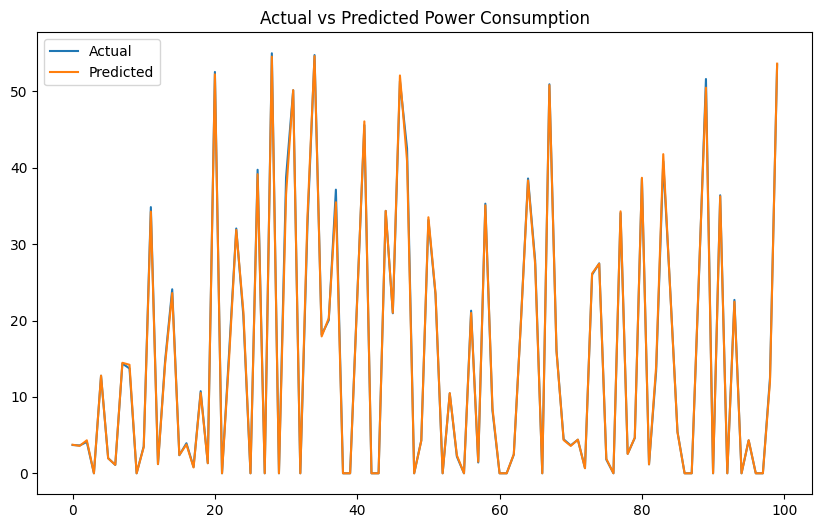

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/drive/MyDrive/Hackathon/merged_data__latest.xlsx'  # Update this to the path of your dataset
df = pd.read_excel(file_path)

# Convert DateTime column to datetime type and extract useful features
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

# Selecting features and target for the model
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute','Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']]  # Features
y = df['Power generated by system | (MW)']  # Target variable

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Square Error (RMSE): {rmse}')

# Plotting the first few actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(predictions[:100], label='Predicted')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.show()
